In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('raw_data.xlsx')

C:\Users\mrcra\anaconda3\envs\briopreenv\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
# remove row that have communicability and prepatent period in index column
df = df[(df["index"]!="Communicability")]
df = df[(df["index"]!="Prepatent period")]

In [6]:
print(df.groupby(['index','Dirangkum atau tidak?']).size())

index                   Dirangkum atau tidak?
Agent                   Clear                      6
                        Perlu validasi           107
Classification          Clear                    110
                        Perlu validasi             3
Clinical findings       Clear                      1
                        Perlu validasi           112
Cycle                   Clear                     46
                        Perlu validasi            67
Diagnostic tests        Clear                     26
                        Perlu validasi            87
Disease                 Clear                    112
                        Perlu validasi             1
Epidemiology            Perlu validasi           113
Incubation period       Clear                     96
                        Perlu validasi            17
Prevention              Clear                     26
                        Perlu validasi            87
Reservoir               Clear                     43


In [7]:
# remove row that majority of its contents can't be summarized
df = df[(df["index"]!="Classification")]
df = df[(df["index"]!="Disease")]
df = df[(df["index"]!="Incubation period")]

In [8]:
df = df.dropna()

In [10]:
df

,Unnamed: 0,disease,index,0 (data),1 (summary),2 (second opinion),Dirangkum atau tidak?,Validated by doctor
2,2,Anthrax,Syndromes and synonyms,"Charbon, malignant pustule, malignant edema, w...","Charbon, malignant pustule, malignant edema, w...","Charbon, malignant pustule, malignant edema, w...",Clear,False
3,3,Anthrax,Agent,"Spores of Bacillus anthracis, a Gram-positive,...","Spores of Bacillus anthracis, a Gram-positive,...","Spores of Bacillus anthracis, a Gram-positive,...",Perlu validasi,False
4,4,Anthrax,Reservoir,"Soil, animal hair, wool or hides, particularly...","Soil, animal hair, wool or hides, particularly...","Soil, animal hair, wool or hides, particularly...",Perlu validasi,False
5,5,Anthrax,Vector,Tabanid and Stomoxys flies and mosquitoes can ...,"Tabanid and Stomoxys flies and mosquitoes, blo...","Tabanid and Stomoxys flies and mosquitoes, blo...",Perlu validasi,False
6,6,Anthrax,Transmission,Contact with infected animal tissue. Cutaneous...,Contact with infected animal tissue,Contact with infected animal tissue,Perlu validasi,False
...,...,...,...,...,...,...,...,...
1801,1801,Zika Fever,Clinical findings,Mild self-limiting dengue-like febrile illness...,Mild self-limiting dengue-like febrile illness...,Mild self-limiting dengue-like febrile illness...,Clear,False
1802,1802,Zika Fever,Diagnostic tests,Virus detection in the blood by RT-PCR or viru...,Virus detection in the blood by RT-PCR or viru...,Virus detection in the blood by RT-PCR or viru...,Perlu validasi,False
1803,1803,Zika Fever,Therapy,Supportive.,Supportive.,Supportive.,Clear,False
1804,1804,Zika Fever,Prevention,Anti-mosquito precautions.,Anti-mosquito precautions.,Anti-mosquito precautions.,Clear,False


In [21]:
max_input_len =  df["0 (data)"].str.len().max()
min_input_len = df["0 (data)"].str.len().min()

max_target_len = df["1 (summary)"].str.len().max()
min_target_len = df["1 (summary)"].str.len().min()

In [25]:
df["0 (data)"].str.len().describe()

count    1157.000000
mean      298.889369
std       295.273947
min         4.000000
25%        94.000000
50%       203.000000
75%       399.000000
max      1758.000000
Name: 0 (data), dtype: float64

<Axes: ylabel='Frequency'>

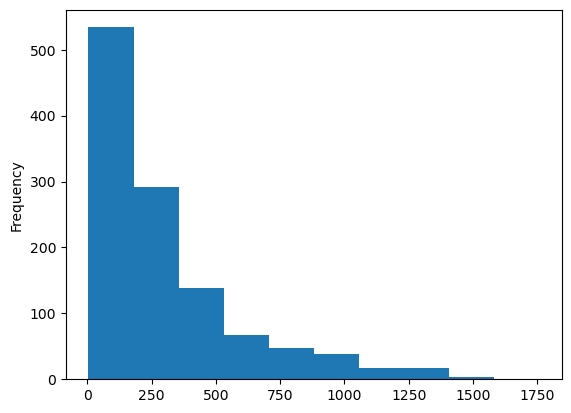

In [35]:
df["0 (data)"].str.len().plot.hist()

<Axes: >

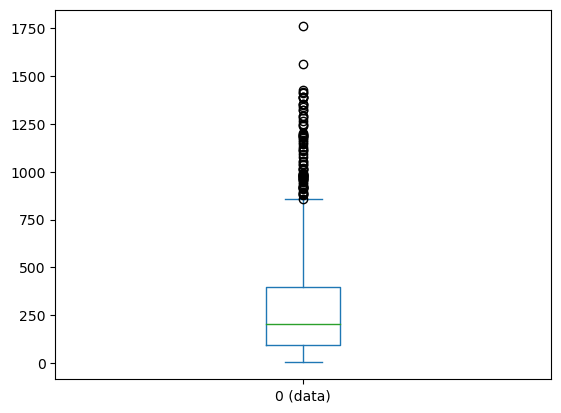

In [33]:
df["0 (data)"].str.len().plot.box()

In [31]:
df["0 (data)"].str.len()

2        80
3       276
4       150
5       127
6       361
       ... 
1801    244
1802    134
1803     11
1804     26
1805    982
Name: 0 (data), Length: 1157, dtype: int64

In [26]:
df["1 (summary)"].str.len().describe()

count    1157.000000
mean      112.240277
std        95.767033
min         4.000000
25%        43.000000
50%        89.000000
75%       145.000000
max       775.000000
Name: 1 (summary), dtype: float64

<Axes: ylabel='Frequency'>

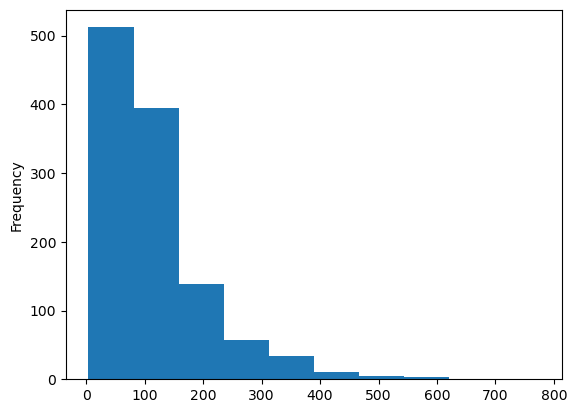

In [36]:
df["1 (summary)"].str.len().plot.hist()

<Axes: >

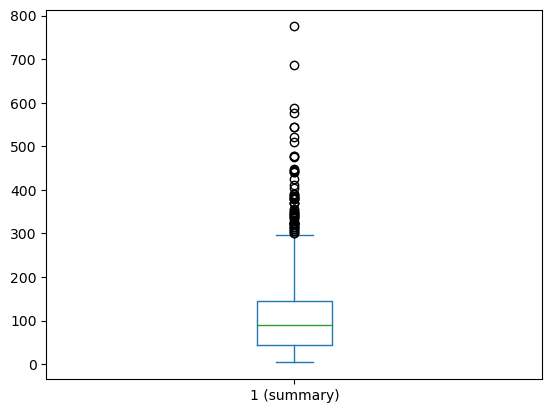

In [34]:
df["1 (summary)"].str.len().plot.box()

In [17]:
print(max_input_len, min_input_len)

1758 4


In [22]:
print(max_target_len, min_target_len)

775 4


In [19]:
print(df[df["0 (data)"].str.len()==min_input_len])

      Unnamed: 0                            disease                   index   
1650        1650  Severe Acute Respiratory Syndrome  Syndromes and synonyms  \

     0 (data) 1 (summary) 2 (second opinion) Dirangkum atau tidak?   
1650     SARS        SARS               SARS                 Clear  \

      Validated by doctor  
1650                False  


In [20]:
print(df[df["0 (data)"].str.len()==max_input_len])

      Unnamed: 0 disease         index   
1533        1533   Mumps  Epidemiology  \

                                               0 (data)   
1533  Studies of unvaccinated populations in some we...  \

                                            1 (summary)   
1533  Studies of unvaccinated populations in some we...  \

                                     2 (second opinion) Dirangkum atau tidak?   
1533  Studies of unvaccinated populations in some we...        Perlu validasi  \

      Validated by doctor  
1533                False  


In [23]:
print(df[df["1 (summary)"].str.len()==max_target_len])

      Unnamed: 0 disease              index   
1529        1529   Mumps  Clinical findings  \

                                               0 (data)   
1529  Up to one-third of cases are subclinical. The ...  \

                                            1 (summary)   
1529  The illness begins with a prodrome of fever, m...  \

                                     2 (second opinion) Dirangkum atau tidak?   
1529  The illness begins with a prodrome of fever, m...        Perlu validasi  \

      Validated by doctor  
1529                False  


In [24]:
print(df[df["1 (summary)"].str.len()==min_target_len])

      Unnamed: 0                            disease                   index   
1650        1650  Severe Acute Respiratory Syndrome  Syndromes and synonyms  \
1668        1668                      Sindbis Fever               Reservoir   
1700        1700            Tick-borne Encephalitis               Reservoir   

                                               0 (data) 1 (summary)   
1650                                               SARS        SARS  \
1668  Wild, migratory birds of the order Passeriform...        Wild   
1700  The only real reservoir is the tick. Viremia p...        tick   

     2 (second opinion) Dirangkum atau tidak?  Validated by doctor  
1650               SARS                 Clear                False  
1668               Wild        Perlu validasi                False  
1700               tick        Perlu validasi                False  
